In [2]:
from pydicom import dcmread
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import median_filter
from sklearn.cluster import KMeans
from skimage import morphology,measure

In [3]:
path = dcmread('3154c203-adb6-4379-8c0d-03eaec11fba9')

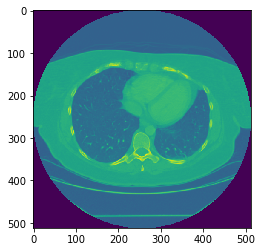

In [4]:
arr = path.pixel_array
def showImg(arr):
    plt.imshow(arr)
    plt.show()
showImg(arr)

In [5]:
mean = np.mean(arr)
std = np.std(arr)
standardized = (arr - mean)/std


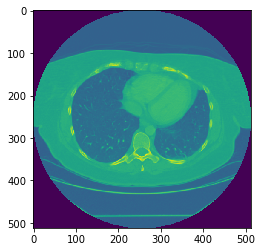

In [6]:
showImg(arr)

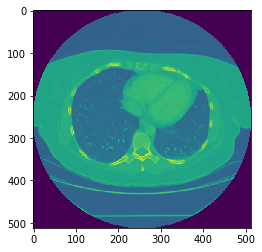

In [7]:
showImg(standardized)

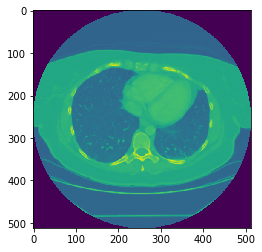

In [8]:
filtered = median_filter(standardized,size = 3)
showImg(filtered)

In [9]:
kmeans = KMeans(n_clusters=2).fit(np.reshape(filtered,[np.prod(filtered.shape),1]))
centers = sorted(kmeans.cluster_centers_.flatten())
centers

[-1.6196218577228234, 0.4350578731156848]

-0.5922819923035694


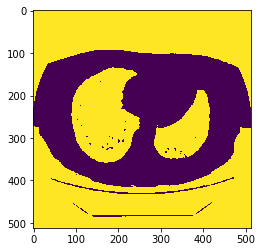

In [10]:
threshold = np.mean(centers)
print(threshold)
threshed = np.where(filtered<abs(threshold),1.0,0.0)
showImg(threshed)

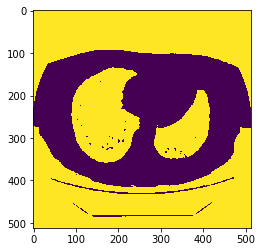

In [11]:
showImg(threshed)

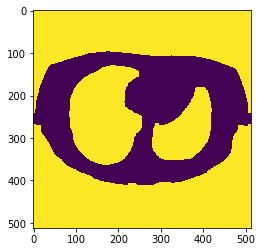

In [12]:
dialated = morphology.dilation(threshed,np.ones([10,10]))
showImg(dialated)


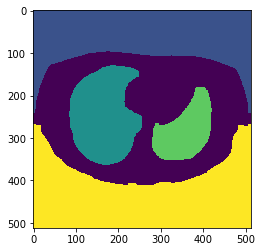

In [13]:
labels = measure.label(dialated)
showImg(labels)

In [14]:
label_vals = np.unique(labels)
regions = measure.regionprops(labels)
for region in regions:
    Box = region.bbox
    print(Box)

(0, 0, 243, 512)
(130, 85, 363, 255)
(182, 279, 353, 420)
(267, 0, 512, 512)


In [15]:
targets = []
for region in regions:
    Box = region.bbox
    if(Box[0]>40 and Box[2]<472 and Box[3]<475 and Box[2]- Box[0]<475 ):
        targets.append(region.label)
        
targets        

[2, 3]

In [ ]:
mask = np.zeros([512,512],dtype=np.int8)
for target in targets:
    mask = mask + np.where(label_vals== target,1,0)
#mask = morphology.dilation(mask,np.ones([10,10]))
showImg(mask)

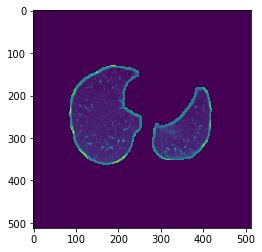

In [17]:
showImg(mask*arr)